In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data=pd.read_csv(r"C:\Users\Aakash Krishnan U\Downloads\loan_data_set.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [33]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [64]:
X=data[["LoanAmount","ApplicantIncome"]]

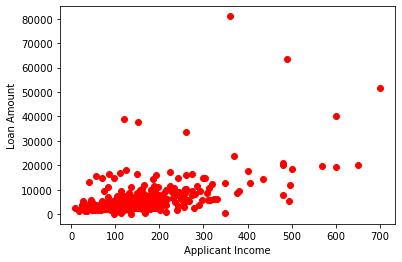

In [65]:
plt.scatter(X["LoanAmount"],X["ApplicantIncome"],c="red")
plt.xlabel("Applicant Income")                         
plt.ylabel("Loan Amount")
plt.show()

In [66]:
K=3
Centroids=(X.sample(n=K))

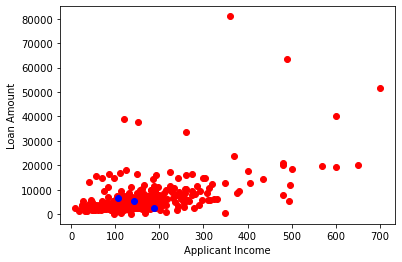

In [67]:
plt.scatter(X["LoanAmount"],X["ApplicantIncome"],c="red")
plt.scatter(Centroids["LoanAmount"],Centroids["ApplicantIncome"],c="blue")
plt.xlabel("Applicant Income")                         
plt.ylabel("Loan Amount")
plt.show()

In [68]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_C in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_C["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_C["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dis=row[1]
        POS=1
        for i in range(K):
            if row[i+1] < min_dis:
                min_dis=row[i+1]
                POS=i+1
        C.append(POS)
    X["Cluster"]=C
    Centroids_new=X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff=(Centroids_new["LoanAmount"]-Centroids["LoanAmount"]).sum()+(Centroids_new["ApplicantIncome"]-Centroids["ApplicantIncome"]).sum()
        print(diff.sum())
    Centroids=X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-68-c3d5f78e3308>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-68-c3d5f78e3308>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


2692.507312121807
1557.9588072157756
1492.2166852498326
659.1682175479923
634.4203865801519
474.62563591420474
257.29885012715783
184.7381538273445
39.623633009502356
20.046170731310482
19.921050234783706
19.904655093560706
0.0


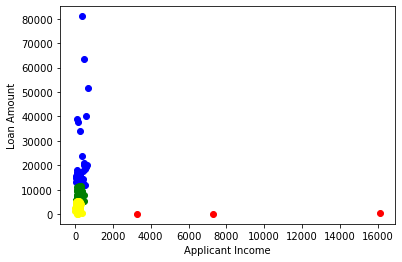

In [69]:
colour=["blue","green","yellow"]
for K in range(K):
    data=X[X["Cluster"]==K+1]
    plt.scatter(data["LoanAmount"],data["ApplicantIncome"],c=colour[K])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel("Applicant Income")                         
plt.ylabel("Loan Amount")
plt.show()